In [1]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import numpy as np
import pandas as pd
import seaborn as sn
import utils

plt.style.use("ggplot")

# Plot ANC versus SO4

See e-mail from Rolf received 11.09.2023 at 12.18.

In [2]:
# Parameters of interest for analysis
inc_par_list = [
    "SO4_µeq/l",
    "NO3-N_µeq/l",
    "Cl_µeq/l",
    "Ca_µeq/l",
    "Mg_µeq/l",
    "CaMg_µeq/l",
    "H_µeq/l",
    "SAA_µeq/l",
    "ANC_µeq/l",
    "OrgAnions_µeq/l",
    "HCO3_µeq/l",
    "TOC_mg C/l",
]

par_list = [
    "SO4_µeq/l",
    "ANC_µeq/l",
]

# Periods to consider
st_yr, end_yr = 1990, 2020

In [3]:
# Station propertiess
xl_path = r"../data/all_icpw_sites_mar_2023.xlsx"
stn_df = pd.read_excel(xl_path, sheet_name="all_icpw_stns")

# Median annual chemistry
csv_path = r"./data/thematic_report_2023_working_data.csv"
wc_df = pd.read_csv(csv_path, encoding="utf-8")
wc_df["sample_date"] = pd.to_datetime(wc_df["sample_date"], format="%Y-%m-%d")
wc_df["year"] = wc_df["sample_date"].dt.year
wc_df = wc_df.groupby(["station_id", "year"]).median(numeric_only=True).reset_index()
wc_df = wc_df[["station_id", "year"] + par_list]

# Selection criteria
csv_path = r"./data/selection_criteria_by_station-par-period.csv"
inc_df = pd.read_csv(csv_path, encoding="utf-8")
inc_df = inc_df[["station_id", "period"] + inc_par_list]
inc_df.set_index(["station_id", "period"], inplace=True)
inc_df[inc_df == 0] = np.nan
inc_df.dropna(how="any", inplace=True)
inc_df.reset_index(inplace=True)
inc_df = inc_df.query(f"period == '{st_yr}-{end_yr}'")

# Get just data of interest
stn_list = list(inc_df["station_id"].unique())
wc_df = wc_df.query("(station_id in @stn_list) and (@st_yr <= year <= @end_yr)")

wc_df.rename(
    {"SO4_µeq/l": "SO4 (µeq/l)", "ANC_µeq/l": "ANC (µeq/l)"},
    axis="columns",
    inplace=True,
)
wc_df.head()

,station_id,year,SO4 (µeq/l),ANC (µeq/l)
0,100,1990,60.377924,-21.348747
1,100,1991,64.541919,-19.380456
2,100,1992,58.295927,-6.992785
3,100,1993,45.803942,-10.194860
4,100,1994,45.803942,-12.193611


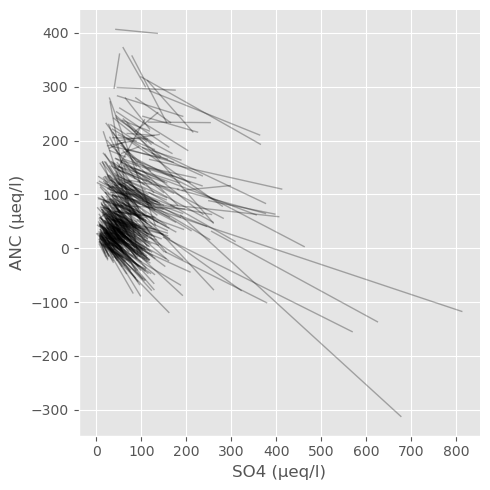

In [4]:
sn.lmplot(
    data=wc_df,
    x="SO4 (µeq/l)",
    y="ANC (µeq/l)",
    scatter=False,
    hue="station_id",
    fit_reg=True,
    ci=None,
    legend=False,
    line_kws={"alpha": 0.3, "color": "black", "linewidth": 1},
)

png_path = r"./results/anc_versus_so4_1990-2020.png"
plt.savefig(png_path, dpi=200, bbox_inches="tight")